# LAB 10 Food scraping [Total: 4 points]

The purpose of this assignment is for you to put together all the things you have learned this semester. This will be accomplished through a coding assignment. In particular, you will the the [Food Data Central API](https://fdc.nal.usda.gov/api-guide.html) from the US Department of Agriculture to pull the nutritional content of various common foods. You will carry out this task in the present notebook, and use the notebook to document the various steps of the exercise and to answer all questions.

## Required skills

This lab will let you practice the following:

- Web Scraping / APIs
- Data Wrangling
- Data Visualization
- Data structures (JSON)
- Data frames
- Summarizing data

## API setup instructions

<div class="alert alert-warning">⚠️ For any issue with registering your API key, please contact the <a src="https://fdc.nal.usda.gov/contact.html">Food Data Central team</a>. We are unable to assist with API registration issues. ⚠️</div>

To work on this notebook you need to register an API key. Please follow these instructions to do so:
1. Go to https://fdc.nal.usda.gov/api-key-signup.html;
2. Enter your first name, last name, and UMD email address;
3. Click on the sign up button;
4. Wait for the email with the API key. You should receive a confirmation email in a few minutes.

You should familiarize with the [API developer manual](https://api.data.gov/docs/developer-manual/) that explains how to use the newly created API key in your code.

**You should include your API key in the notebook so we can re-run your code. (See instructions below.)**

## Q1

**Points**: 1

The FoodCentral database contains nutrient information (e.g. amount dietary fibers) of various food products (e.g. pizza, pasta, etc.). Write a function called `food_nutrients` that uses the `GET /v1/foods/search` endpoint [[API docs](https://fdc.nal.usda.gov/api-guide.html#bkmk-6)] to summarize the nutrient information of the most common types of foods.

Note that the search endpoint returns all grocery items that match a particular query. For example, a search for &ldquo;chicken&rdquo; may return both &ldquo;_chicken_ breasts&rdquo; and &ldquo;fried _chicken_&rdquo;. To keep things simple, your function should return the average nutrient value across different food products.

Your function should take a single parameters &mdash; a query string. Using the key created above, your function should query the API with the given string and return a dataframe with three columns (in this order):
* `nutrientName` (dtype: `object`) &ndash; the name of the nutrient;
* `value` (dtype: `float64`) &ndash; the average amount of the nutrient across all products that match the query;
* `unitName` (dtype: `object`) &ndash; the unit of measurement associated to the nutrient.

In addition, your function should filter the results to keep only the most common nutrients, and abbreviate the name of the nutrients to simplify the rest of the analysis. The following table lists the nutrients to include in the data frame, and how they should be renamed after cleaning.

| Nutrient name from API | Cleaned nutrient name |
| --------- | --------- |
| `Energy`  | `Energy`  |
| `Sugars, total including NLEA` | `Sugar` |
| `Carbohydrate, by difference` | `Carbs` |
| `Protein` | `Protein` |
| `Fiber, total dietary` | `Fiber` |
| `Total lipid (fat)` | `Fat` |
| `Fatty acids, total saturated` | `Sat_Fatty_Acids`
| `Fatty acids, total trans` | `Trans_Fatty_Acids` |
| `Fatty acids, total polyunsaturated` | `Unsat_Fatty_Acids` |
| `Cholesterol` | `Cholesterol` |
| `Calcium, Ca` | `Calcium` |
| `Iron, Fe` | `Iron` |
| `Sodium, Na` | `Sodium` |
| `Potassium, K` | `Potassium` |
| `Vitamin A, IU` | `VitaminA` |
| `Vitamin C, total ascorbic acid` | `VitaminC` |
| `Vitamin D (D2 + D3), International Units` | `VitaminD` |

For example, if the requested food `"pizza"`, then you should get the following data frame:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>nutrientName</th>
      <th>value</th>
      <th>unitName</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Calcium</td>
      <td>178.480000</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Carbs</td>
      <td>28.896400</td>
      <td>G</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Cholesterol</td>
      <td>26.700000</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Energy</td>
      <td>577.800000</td>
      <td>KCAL</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Fat</td>
      <td>12.126000</td>
      <td>G</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Fiber</td>
      <td>1.784000</td>
      <td>G</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Iron</td>
      <td>1.943800</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Potassium</td>
      <td>201.921053</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Protein</td>
      <td>11.419200</td>
      <td>G</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Sat_Fatty_Acids</td>
      <td>5.141500</td>
      <td>G</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Sodium</td>
      <td>618.700000</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Sugar</td>
      <td>3.325400</td>
      <td>G</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Trans_Fatty_Acids</td>
      <td>0.187065</td>
      <td>G</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Unsat_Fatty_Acids</td>
      <td>2.293108</td>
      <td>G</td>
    </tr>
    <tr>
      <th>14</th>
      <td>VitaminA</td>
      <td>403.357143</td>
      <td>IU</td>
    </tr>
    <tr>
      <th>15</th>
      <td>VitaminC</td>
      <td>3.065306</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>16</th>
      <td>VitaminD</td>
      <td>0.083333</td>
      <td>IU</td>
    </tr>
  </tbody>
</table>

In [ ]:
import pandas as pd
import requests

URL = "https://api.nal.usda.gov/fdc/v1/foods/search"
API_KEY = "" # Insert your API key here

TO_REPLACE = {
    'Energy':	 	 	 	 	 				'Energy',
    'Total Sugars':				                'Sugar',
    'Carbohydrate, by difference':				'Carbs',
    'Protein':									'Protein',
    'Fiber, total dietary':						'Fiber',
    'Total lipid (fat)':						'Fat',
    'Fatty acids, total saturated':				'Sat_Fatty_Acids',
    'Fatty acids, total trans':					'Trans_Fatty_Acids',
    'Fatty acids, total polyunsaturated':		'Unsat_Fatty_Acids',
    'Cholesterol':								'Cholesterol',
    'Calcium, Ca':								'Calcium',
    'Iron, Fe':									'Iron',
    'Sodium, Na':								'Sodium',
    'Potassium, K':								'Potassium',
    'Vitamin A, IU':							'VitaminA',
    'Vitamin C, total ascorbic acid':			'VitaminC',
    'Vitamin D (D2 + D3), International Units':	'VitaminD',
}


def food_nutrients(food):
...

Use this cell to test your code. You should try it with different foods, like `"apple"` or `"friend chicken"`.

In [ ]:
query = 'pizza'
food_nutrients(query)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

---

## Q2
**Points**: 1

Write a function called `menu_nutrients` that returns the main nutritional information of a menu (i.e. a list of foods).

Your function should take a single parameter &mdash; a list of food names (i.e. a menu). It should call the `food_nutrients` function for each food in the menu and return a data frame with the following columns (all with dtype `float64`):
- Energy
- Carbs
- Protein
- Fiber
- Fat

Your function should also replace all missing values (`NaN`) with zeroes.

For example, if the menu is `['bread', 'cheese', 'chocolate']` then your function should return the following data frame.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Energy</th>
      <th>Carbs</th>
      <th>Protein</th>
      <th>Fiber</th>
      <th>Fat</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>bread</th>
      <td>543.362069</td>
      <td>80.399000</td>
      <td>13.8038</td>
      <td>5.508333</td>
      <td>8.794400</td>
    </tr>
    <tr>
      <th>cheese</th>
      <td>361.000000</td>
      <td>9.921800</td>
      <td>18.8216</td>
      <td>0.322449</td>
      <td>26.253800</td>
    </tr>
    <tr>
      <th>chocolate</th>
      <td>460.285714</td>
      <td>53.808571</td>
      <td>5.7472</td>
      <td>3.733333</td>
      <td>26.305306</td>
    </tr>
  </tbody>
</table>

### Hint

You may find it useful to use the `pivot` function for this task.

In [ ]:
import pandas as pd

def menu_nutrients(foods):
...

Use this cell to test your code. You should try it with different menus, for example bread, cheese, and chocolate.

In [ ]:
menu = ['bread', 'cheese', 'chocolate']
menu_nutrients(menu)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

---

## Q3
**Points**: 1

Using the `menu_nutrients` function from Q2, write a new function called `carbs_by_fiber` that produces a scatter plot showing the association between the amount of carbs and fiber in a typical food menu. It should take a single parameter &ndash; a list of food names (i.e. a menu).

For example, if the menu is:
```python
["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
```
Then your plot should look like this:

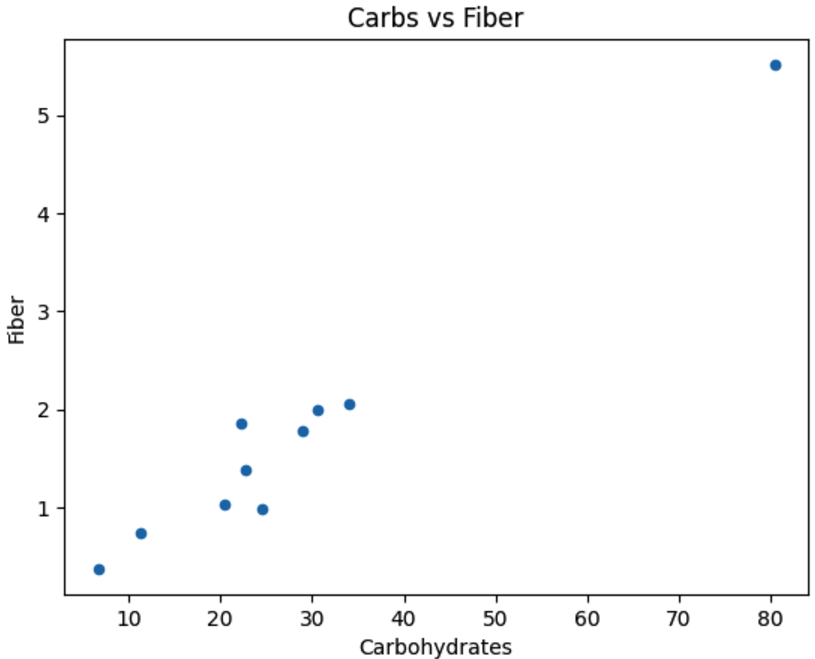

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def carbs_by_fiber(menu):
...

Run the cell to display your plot. For grading purposes, this cell cannot be edited.

In [ ]:
menu = ["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
carbs_by_fiber(menu)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

---

## Q4
**Points**: 1

Using the `menu_nutrients` function from Q2, write a new a function called `foods_carbs` that produces a bar plot showing which food has the most carbs. It should take a single parameter &ndash; a list of food items (i.e. a menu).

For example, if the menu is:
```python
["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
```
Then your plot should look like this:
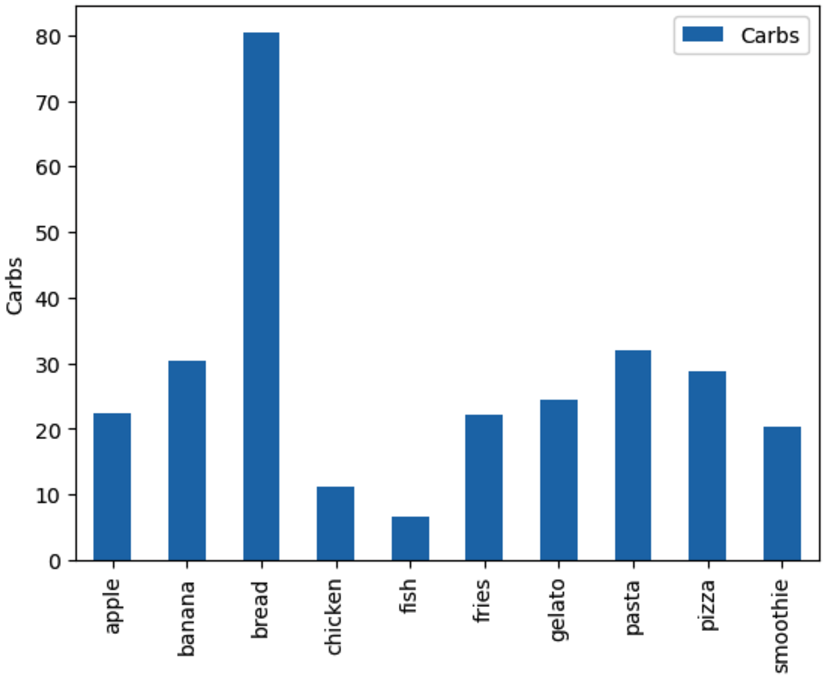

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

...

Run the cell to display your plot. For grading purposes, this cell cannot be edited.

In [ ]:
menu = ["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
food_carbs(menu)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

---

## Submission

Don't forget to run all cells in your notebook and then save it. To save, click on *File*, then select *Save/Save Notebook*. After that, download the notebook by going to *File --> Download* (for Anaconda Notebook) or *File --> Download .ipynb* (for Colab). Finally, submit the notebook on Gradescope using the link found on ELMS.